In [1]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [2]:
data_image = 'fashion-data/images/'
data_anno = 'fashion-data/annotation/'

data_image_train = data_image + 'train2020/train/'
data_anno_train = data_anno + 'attributes_train2020.json'

image name: c4200760f571d26c90114852b360a16d.jpg


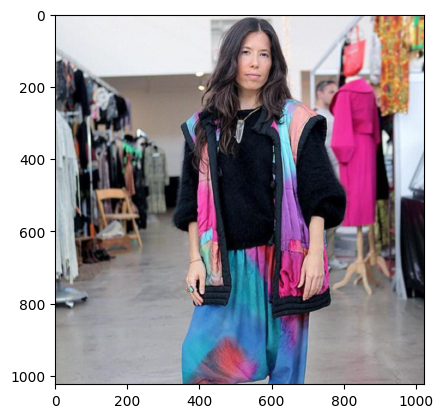

In [3]:
img_list = os.listdir(data_image_train)
rand_img = random.choice(img_list)

img = Image.open(data_image_train + rand_img)

print(f'image name: {rand_img}')
plt.imshow(img)

In [4]:
with open(data_anno_train) as f:
    train_anno = json.load(f)

train_anno.keys()

dict_keys(['annotations', 'images', 'info', 'licenses', 'attributes'])

In [12]:
def get_image_infor(image_name, anno):
    for item in anno['images']:
        if(image_name == item['file_name']):
            return item
        
def get_image_anno(image_id, anno):
    for item in anno['annotations']:
        if(item['image_id'] == image_id):
            return item

def get_image_attributes(id_atts, anno_att):
    image_attributes = [{'id': item['id'], 'name': item['name']} for item in anno_att if item['id'] in id_atts]
    return image_attributes

In [13]:
image_infor = get_image_infor(rand_img, train_anno)
image_infor

{'id': 22512,
 'width': 1024,
 'height': 1024,
 'file_name': 'c4200760f571d26c90114852b360a16d.jpg',
 'license': 4,
 'time_captured': 'March-August, 2018',
 'original_url': 'http://farm7.staticflickr.com/6104/6854750852_84f0aac1e7_n.jpg',
 'isstatic': 1,
 'kaggle_id': 'c4200760f571d26c90114852b360a16d'}

In [14]:
image_anno = get_image_anno(image_infor['id'], train_anno)
image_anno

{'image_id': 22512,
 'attribute_ids': [115,
  145,
  146,
  149,
  159,
  214,
  295,
  301,
  305,
  311,
  316,
  317,
  318]}

In [15]:
image_attributes = get_image_attributes(image_anno['attribute_ids'], train_anno['attributes'])
image_attributes

[{'id': 115, 'name': 'symmetrical'},
 {'id': 145, 'name': 'no waistline'},
 {'id': 146, 'name': 'above-the-hip (length)'},
 {'id': 149, 'name': 'mini (length)'},
 {'id': 159, 'name': 'three quarter (length)'},
 {'id': 214, 'name': 'bishop (sleeve)'},
 {'id': 295, 'name': 'no non-textile material'},
 {'id': 301, 'name': 'printed'},
 {'id': 305, 'name': 'gathering'},
 {'id': 311, 'name': 'lining'},
 {'id': 316, 'name': 'no special manufacturing technique'},
 {'id': 317, 'name': 'plain (pattern)'},
 {'id': 318, 'name': 'abstract'}]